In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
zip_path = '/content/drive/MyDrive/test_set.zip'


In [4]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/test_set')

print("Dosya başarıyla çıkarıldı.")


Dosya başarıyla çıkarıldı.


In [5]:
import os
print(os.listdir('/content/test_set'))


['test_set']


In [6]:
# TensorFlow ve veri işleme için gereken kütüphaneleri içe aktarıyoruz
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
# Eğitim verilerini 1.0'a bölerek normalleştiriyoruz, yeniden boyutlandırma ve augment işlemleri yapıyoruz
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # %80 eğitim, %20 doğrulama


In [8]:
train_generator = train_datagen.flow_from_directory(
    '/content/test_set',           # Görsellerin bulunduğu ana klasör
    target_size=(100, 100),        # Tüm resimleri 100x100 boyutuna getir
    batch_size=32,                 # Her seferde 32 görsel alınır
    class_mode='binary',           # Sınıflar ikili: kedi(0) / köpek(1)
    subset='training'              # Eğitim verisi
)

validation_generator = train_datagen.flow_from_directory(
    '/content/test_set',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='validation'            # Doğrulama verisi
)


Found 1619 images belonging to 1 classes.
Found 404 images belonging to 1 classes.


In [9]:
# Basit bir Convolutional Neural Network (CNN) modeli
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),  # 3 renk kanalı
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Çıkış katmanı (ikili sınıflama için)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    loss='binary_crossentropy',  # 0 ve 1 sınıfları için uygun kayıp fonksiyonu
    optimizer='adam',            # Öğrenme sürecinde kullanılacak algoritma
    metrics=['accuracy']         # Eğitimi takip etmek için doğruluk metriği
)


In [11]:
# Modeli eğitiyoruz
history = model.fit(
    train_generator,
    epochs=10,                        # 10 defa eğitim döngüsü
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 1.0000 - loss: 0.0575

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 32s 593ms/step - accuracy: 1.0000 - loss: 0.0567 - val_accuracy: 1.0000 - val_loss: 1.3427e-33
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 591ms/step - accuracy: 1.0000 - loss: 1.3377e-25 - val_accuracy: 1.0000 - val_loss: 5.8306e-34
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 587ms/step - accuracy: 1.0000 - loss: 9.5939e-26 - val_accuracy: 1.0000 - val_loss: 5.8005e-34
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 575ms/step - accuracy: 1.0000 - loss: 3.8288e-26 - val_accuracy: 1.0000 - val_loss: 5.8005e-34
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 577ms/step - accuracy: 1.0000 - loss: 9.3870e-26 - val_accuracy: 1.0000 - val_loss: 5.8005e-34
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 578ms/step - accuracy: 1.0000 - loss: 1.8981e-26 - val_accuracy: 1.0000 - val_loss: 5.8005e-34
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 579ms/step - accuracy: 1.0000 - loss: 1.7651e-26 - val_accuracy: 1.0000 - val_loss: 5.8005e-34
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 587ms/step - a

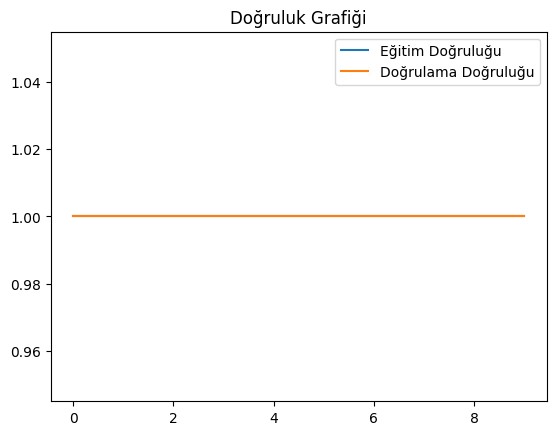

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title('Doğruluk Grafiği')
plt.show()


In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/catt.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Köpek 🐶")
else:
    print("Kedi 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Kedi 🐱
